In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
y = pd.read_excel("ex8_movies.xlsx",sheet_name="y",header=None)
y.shape

(1682, 943)

In [3]:
r = pd.read_excel("ex8_movies.xlsx",sheet_name="R",header=None)
r.shape


(1682, 943)

In [4]:
for i in range(len(r.columns)):
    r[i] = r[i].replace({True:1,False:0})
    
r.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1,1,0,0,1,1,0,0,0,1,...,1,1,1,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = pd.read_excel("movie_params.xlsx",sheet_name="X",header=None)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.048686,-0.400232,1.194119,0.371128,0.407607,0.974407,-0.058410,0.861721,-0.697290,0.288746
1,0.780851,-0.385626,0.521198,0.227355,0.570109,0.641264,-0.550006,0.704021,-0.485835,-0.564624
2,0.641509,-0.547854,-0.083796,-0.598519,-0.017694,0.299736,-0.720807,0.838546,-0.694832,-1.134796
3,0.453618,-0.800218,0.680481,-0.081743,0.136601,0.907561,0.277682,0.369300,-1.261208,-0.235581
4,0.937538,0.106090,0.361953,0.086646,0.287505,0.518644,-0.056871,0.914573,-0.819334,-0.542847


In [6]:
theta = pd.read_excel('movie_params.xlsx', sheet_name='theta', header=None)
theta.head()

,0,1,2,3,4,5,6,7,8,9
0,0.285444,-1.684265,0.262939,-0.287317,0.585725,0.980188,-0.063375,0.767232,-1.104602,-0.251867
1,0.505013,-0.454648,0.317462,-0.115087,0.567704,0.818905,0.461649,1.093063,-1.200294,-0.391617
2,-0.431917,-0.478804,0.846711,-0.011731,-0.138578,0.742591,-0.440276,1.363340,-0.325235,-0.194682
3,0.728598,-0.271894,0.326844,-0.250724,-0.471017,1.215827,-0.106129,1.615801,-0.670805,0.129868
4,0.052119,-1.380697,0.637941,-0.231980,0.246337,1.438879,-0.860022,0.668077,-0.560330,0.414959


In [7]:
def costfunction(X, y, r, theta, Lambda):
    predictions = np.dot(X, theta.T)
    err = predictions-y
    J = (1/2) * np.sum((err**2) * r)
    reg_x = Lambda/2 * np.sum(np.sum(theta**2))
    reg_theta = Lambda/2 * np.sum(np.sum(X**2))
    cost = J + reg_x + reg_theta
    return cost

In [8]:
def gradientDescent(X, y, r, theta, Lambda, num_iter, alpha):
    J_hist = []
    for i in range(num_iter):
        cost = costfunction(X, y, r, theta, Lambda)
        X = X -  alpha*(np.dot(np.dot(X, theta.T) - y, theta) + Lambda*X)
        theta = theta - alpha*(np.dot((np.dot(X, theta.T) - y).T, X) + Lambda*theta) 
        J_hist.append(cost)
        if (i >= 20):
            temp_last=J_hist[len(J_hist)-1]
            temp_before_last=J_hist[len(J_hist)-2]
            print(temp_last,temp_before_last)
            change = -temp_last + temp_before_last
            print("the change is ",change)
            if(0<change<0.001 ):
                break
        print(cost)
    return X, theta, J_hist

In [9]:
def normalizeRatings(y, r):
    ymean = np.sum(y, axis=1)/np.sum(r, axis=1)
    ynorm = np.sum(y, axis=1)*np.sum(r, axis=1) - ymean
    return ymean, ynorm

In [10]:
my_ratings = np.zeros((1682,1))

In [11]:
y1 = np.hstack((my_ratings,y))

In [12]:
my_r = np.zeros((1682,1))
for i in range(len(my_r)):
    if(my_ratings[i] != 0):
        my_r[i] = 1

In [13]:
r1 = np.hstack((my_r, r))

In [14]:
ymean, ynorm = normalizeRatings(y1, r1)
print(pd.DataFrame(ymean).head(15))
print(pd.DataFrame(ynorm).head(15))

           0
0   3.878319
1   3.206107
2   3.033333
3   3.550239
4   3.302326
5   3.576923
6   3.798469
7   3.995434
8   3.896321
9   3.831461
10  3.847458
11  4.385768
12  3.418478
13  3.967213
14  3.778157
                0
0   792352.121681
1    55016.793893
2    24566.966667
3   155074.449761
4    24420.697674
5     2414.423077
6   583684.201531
7   191621.004566
8   348331.103679
9    30345.168539
10  214284.152542
11  312652.614232
12  115732.581522
13  132854.032787
14  324347.221843


In [15]:
num_users = y.shape[1]
num_movies = y.shape[0]
num_features = 10

In [16]:
X1= np.random.randn(num_movies, num_features)
Theta1 = np.random.randn(num_users, num_features)
Lambda=10

In [19]:
x_up, theta_up, J_hist = gradientDescent(X1, np.array(y), np.array(r), Theta1, Lambda, 1500,0.001)

1325012.9856991924
723591.8575897341
708976.9278552403
694642.0494769192
669299.5600110714
626798.0517933938
567198.541455731
505175.8754375358
460739.7225171689
437817.68018807383
427939.6237528298
423744.24340848916
421692.87251308153
420393.3510014828
419336.597871657
418340.42627476476
417337.7766490476
416300.47670536564
415212.56360784936
414061.1260024393
412833.2339651219 414061.1260024393
the change is  1227.8920373173896
412833.2339651219
411515.00103879406 412833.2339651219
the change is  1318.2329263278516
411515.00103879406
410091.4632321225 411515.00103879406
the change is  1423.5378066715784
410091.4632321225
408546.8774088601 410091.4632321225
the change is  1544.5858232624014
408546.8774088601
406865.35397519125 408546.8774088601
the change is  1681.52343366883
406865.35397519125
405031.8335948938 406865.35397519125
the change is  1833.520380297443
405031.8335948938
403033.42113537336 405031.8335948938
the change is  1998.4124595204485
403033.42113537336
400861.0382218

290991.4676358919 291323.4070807786
the change is  331.9394448866951
290991.4676358919
290679.908137687 290991.4676358919
the change is  311.55949820490787
290679.908137687
290387.6703945455 290679.908137687
the change is  292.23774314153707
290387.6703945455
290113.7079954752 290387.6703945455
the change is  273.96239907026757
290113.7079954752
289856.9958514728 290113.7079954752
the change is  256.7121440024348
289856.9958514728
289616.5374646515 289856.9958514728
the change is  240.45838682126487
289616.5374646515
289391.3702520731 289616.5374646515
the change is  225.16721257840982
289391.3702520731
289180.5692441304 289391.3702520731
the change is  210.80100794270402
289180.5692441304
288983.2494558679 289180.5692441304
the change is  197.31978826248087
288983.2494558679
288798.56719909946 288983.2494558679
the change is  184.6822567684576
288798.56719909946
288625.7205680626 288798.56719909946
the change is  172.84663103683852
288625.7205680626
288463.949295073 288625.7205680626


285723.89918142965 285728.9660534467
the change is  5.066872017050628
285723.89918142965
285718.94990505726 285723.89918142965
the change is  4.949276372382883
285718.94990505726
285714.1147753181 285718.94990505726
the change is  4.8351297391345724
285714.1147753181
285709.39048041444 285714.1147753181
the change is  4.724294903688133
285709.39048041444
285704.77383859566 285709.39048041444
the change is  4.616641818778589
285704.77383859566
285700.2617914394 285704.77383859566
the change is  4.512047156284098
285700.2617914394
285695.8513975553 285700.2617914394
the change is  4.410393884056248
285695.8513975553
285691.5398266674 285695.8513975553
the change is  4.311570887919515
285691.5398266674
285687.3243540683 285691.5398266674
the change is  4.215472599084023
285687.3243540683
285683.2023554004 285687.3243540683
the change is  4.121998667891603
285683.2023554004
285679.17130175594 285683.2023554004
the change is  4.031053644488566
285679.17130175594
285675.22875506623 285679.17

285519.9884948285 285520.74935981934
the change is  0.7608649908215739
285519.9884948285
285519.2415382927 285519.9884948285
the change is  0.7469565357896499
285519.2415382927
285518.50821917545 285519.2415382927
the change is  0.733319117280189
285518.50821917545
285517.7882721095 285518.50821917545
the change is  0.7199470659252256
285517.7882721095
285517.08143726765 285517.7882721095
the change is  0.7068348418688402
285517.08143726765
285516.3874602382 285517.08143726765
the change is  0.6939770294702612
285516.3874602382
285515.7060919029 285516.3874602382
the change is  0.6813683352665976
285515.7060919029
285515.03708831826 285515.7060919029
the change is  0.6690035846550018
285515.03708831826
285514.3802105985 285515.03708831826
the change is  0.6568777197389863
285514.3802105985
285513.73522480525 285514.3802105985
the change is  0.6449857932748273
285513.73522480525
285513.1019018339 285513.73522480525
the change is  0.6333229713491164
285513.1019018339
285512.4800173096 28

285486.01489639434 285486.1655684989
the change is  0.15067210455890745
285486.01489639434
285485.8667600002 285486.01489639434
the change is  0.14813639415660873
285485.8667600002
285485.7211155741 285485.8667600002
the change is  0.1456444260547869
285485.7211155741
285485.5779201776 285485.7211155741
the change is  0.14319539652206004
285485.5779201776
285485.43713166256 285485.5779201776
the change is  0.1407885150401853
285485.43713166256
285485.29870865337 285485.43713166256
the change is  0.13842300919350237
285485.29870865337
285485.16261053196 285485.29870865337
the change is  0.13609812140930444
285485.16261053196
285485.02879742463 285485.16261053196
the change is  0.13381310732802376
285485.02879742463
285484.89723018504 285485.02879742463
the change is  0.13156723958672956
285484.89723018504
285484.76787038206 285484.89723018504
the change is  0.12935980298789218
285484.76787038206
285484.640680284 285484.76787038206
the change is  0.12719009805005044
285484.640680284
2854

285479.0457532114 285479.077305382
the change is  0.0315521705779247
285479.0457532114
285479.01474673365 285479.0457532114
the change is  0.031006477773189545
285479.01474673365
285478.98427715234 285479.01474673365
the change is  0.030469581310171634
285478.98427715234
285478.95433581545 285478.98427715234
the change is  0.029941336892079562
285478.95433581545
285478.92491421 285478.95433581545
the change is  0.029421605460811406
285478.92491421
285478.8960039635 285478.92491421
the change is  0.028910246503073722
285478.8960039635
285478.8675968382 285478.8960039635
the change is  0.028407125268131495
285478.8675968382
285478.83968473127 285478.8675968382
the change is  0.027912106947042048
285478.83968473127
285478.8122596704 285478.83968473127
the change is  0.027425060863606632
285478.8122596704
285478.7853138135 285478.8122596704
the change is  0.026945856923703104
285478.7853138135
285478.7588394449 285478.7853138135
the change is  0.02647436858387664
285478.7588394449
285478.7

285477.65418590023 285477.659510777
the change is  0.005324876750819385
285477.65418590023
285477.64898141637 285477.65418590023
the change is  0.005204483866691589
285477.64898141637
285477.6438952977 285477.64898141637
the change is  0.005086118646431714
285477.6438952977
285477.6389255478 285477.6438952977
the change is  0.00496974989073351
285477.6389255478
285477.6340702014 285477.6389255478
the change is  0.004855346400290728
285477.6340702014
285477.629327325 285477.6340702014
the change is  0.0047428764519281685
285477.629327325
285477.62469501456 285477.629327325
the change is  0.004632310417946428
285477.62469501456
285477.62017139426 285477.62469501456
the change is  0.004523620300460607
285477.62017139426
285477.61575462035 285477.62017139426
the change is  0.00441677391063422
285477.61575462035
285477.6114428753 285477.61575462035
the change is  0.0043117450550198555
285477.6114428753
285477.60723437154 285477.6114428753
the change is  0.004208503756672144
285477.607234371

Text(0.5, 1.0, 'Cost function using Gradient Descent')

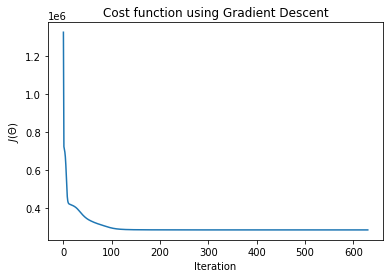

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [21]:
print(pd.DataFrame(x_up).head(12))
print(pd.DataFrame(theta_up).head(12))

           0         1         2         3         4         5         6  \
0   0.253359 -0.382596 -2.475324  0.746358  0.744343 -1.266595 -0.827240   
1   0.418418 -0.312346 -0.566478  0.260690 -0.182620  0.869044  0.765106   
2   0.583927 -0.155924 -0.508582  0.196614  0.435079 -0.160133  0.460816   
3   0.942976 -1.027079 -0.271399  0.016423  0.449337  0.591511  0.773997   
4   0.109221  0.190764 -0.043884  0.227668  0.790482  0.296085  0.610693   
5   0.323255 -0.052521  0.135797  0.066547  0.064180 -0.042330 -0.135569   
6   1.267797 -0.423301 -1.188486  1.564500  0.870891 -1.174745  0.508250   
7   0.236324 -1.083125 -0.420020 -0.023670  0.745718  0.041767 -0.508140   
8   1.198797 -0.082576 -0.211913 -0.154877  1.629673 -0.627236 -0.406619   
9   0.880783  0.077899  0.369896  0.670777  0.105087  0.115397 -0.481141   
10  0.574063 -0.991414 -0.504918 -0.146836  1.049914  0.040469  1.492409   
11  1.157126 -1.788038 -0.219962 -0.365480  0.995151 -0.298141  1.309097   

           

In [22]:
predictions = np.dot(x_up, theta_up.T)
print("**************************")
print(pd.DataFrame(predictions).head(12))
print("**************************")
print("**************************")
print(pd.DataFrame(predictions[:,0].reshape(1682,1)).head(100))
df = pd.DataFrame(np.hstack((my_predictions,np.array(movies)[:,np.newaxis])))


**************************
         0         1         2         3         4         5         6    \
0   4.170792  1.801295 -0.087592  0.584453  3.361034  2.865367  2.125957   
1   2.016236 -0.118211 -0.011282 -0.078000  1.297484 -0.051100  1.727912   
2   1.255515  0.161190  0.091492  0.010486  0.614131  0.230817  0.324499   
3   3.450572  0.139541  0.032677 -0.097442  1.072996  1.683250  2.652917   
4   0.733843 -0.165567  0.060522  0.056227  0.265989 -0.450560  2.296744   
5   0.477456  0.292819 -0.007503 -0.041272 -0.039003  0.505075  0.223831   
6   5.179899  1.383865  0.148344  0.529106  2.682852  2.176293  3.938537   
7   2.670840  0.543126  0.052388  0.092521  1.456181  2.951965  2.712690   
8   2.776628  1.882697 -0.031983  0.132897 -0.752539  2.847045  2.667652   
9   1.759705  0.819291 -0.098746 -0.112284  0.715011  1.190455  1.927824   
10  3.347815  0.048021  0.312886  0.268310  0.560903  1.147983  2.779564   
11  4.633100  0.592668  0.425567  0.271930  0.212128  3.08275

NameError: name 'my_predictions' is not defined

In [29]:
movies = open('movie_ids.txt', 'r').read().split("\n")[:-1]
print(predictions[:, 15].shape)
print(ymean.shape)
my_predictions = predictions[:, 1] + ymean
my_predictions = pd.DataFrame(my_predictions)

(1682,)
(1682,)


In [30]:
df = pd.DataFrame(np.hstack((my_predictions,np.array(movies).reshape(len(y1),1))))


In [31]:
df.sort_values(by=[0],ascending=False,inplace=True)
df.head(20)
#the english patient drama romance sacrifise war
#contact romance sacrifice
#titanic romance sacrifice 
#the full monty comedy romance
#fargo black comedy crime 
#L.A. Confidential crime drama 

,0,1
285,7.538536460148697,"286 English Patient, The (1996)"
257,7.331140531748437,258 Contact (1997)
312,7.285424757311516,313 Titanic (1997)
268,6.987797355621194,"269 Full Monty, The (1997)"
99,6.983684981307633,100 Fargo (1996)
301,6.939415893136619,302 L.A. Confidential (1997)
299,6.85692933896372,300 Air Force One (1997)
49,6.848287550595641,50 Star Wars (1977)
274,6.814944963728076,275 Sense and Sensibility (1995)
271,6.355841042768121,272 Good Will Hunting (1997)
